In [20]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
heart_disease = fetch_ucirepo(id=45) 
  
    
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
print(y.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


,num
0,0
1,2
2,1
3,0
4,0


In [5]:
print("Feature dataset dimensions (X):", X.shape)
print("Target dataset dimensions (y):", y.shape)

Feature dataset dimensions (X): (303, 13)
Target dataset dimensions (y): (303, 1)


In [6]:
print("Target unique values:", y['num'].unique())

Target unique values: [0 2 1 3 4]


In [7]:
print("Summary statistics:")
print(X.describe())

Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std    

In [8]:
print("Target label distribution:")
print(y['num'].value_counts())

Target label distribution:
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


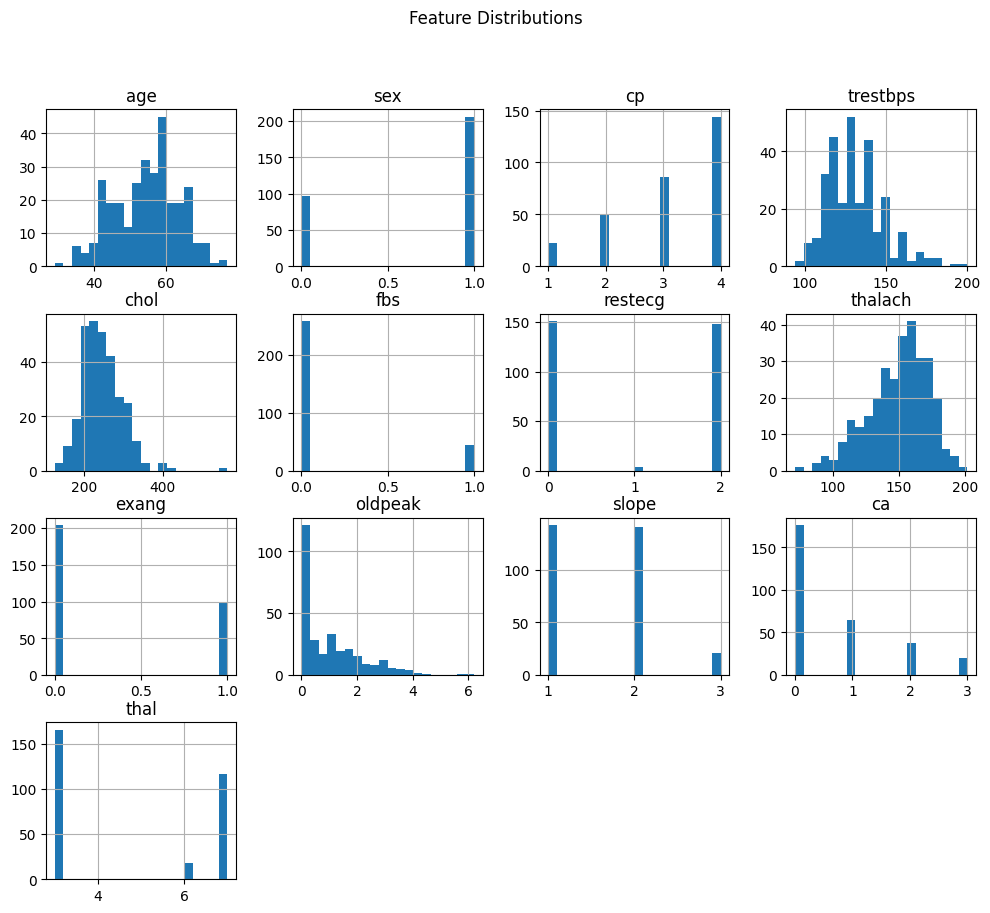

In [9]:
X.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

In [10]:
print("Missing values Features:")
print(X.isnull().sum())

print("\nMissing values Target:")
print(y.isnull().sum())

Missing values Features:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values Target:
num    0
dtype: int64


In [11]:
print(X.ca.unique())
print(X.thal.unique())

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


In [13]:
X = X.copy()  # Create a deep copy of the DataFrame
X['ca'] = X['ca'].fillna(X['ca'].mode()[0])
X['thal'] = X['thal'].fillna(X['thal'].mode()[0])

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [15]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'ca', 'thal'], drop_first=True)

In [16]:
scaler = StandardScaler()
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [17]:
print(X.describe())

                age         sex      trestbps          chol         fbs  \
count  3.030000e+02  303.000000  3.030000e+02  3.030000e+02  303.000000   
mean  -1.465641e-18    0.679868  4.426236e-16  2.345026e-16    0.148515   
std    1.001654e+00    0.467299  1.001654e+00  1.001654e+00    0.356198   
min   -2.819115e+00    0.000000 -2.145037e+00 -2.334877e+00    0.000000   
25%   -7.135564e-01    0.000000 -6.652997e-01 -6.905030e-01    0.000000   
50%    1.729945e-01    1.000000 -9.616980e-02 -1.101357e-01    0.000000   
75%    7.270888e-01    1.000000  4.729601e-01  5.476139e-01    0.000000   
max    2.500191e+00    1.000000  3.887739e+00  6.138485e+00    1.000000   

            thalach       exang       oldpeak       slope        cp_2  \
count  3.030000e+02  303.000000  3.030000e+02  303.000000  303.000000   
mean  -1.172513e-16    0.326733  2.345026e-17    1.600660    0.165017   
std    1.001654e+00    0.469794  1.001654e+00    0.616226    0.371809   
min   -3.442067e+00    0.000000 

In [19]:
correlation_matrix = X.corr()
print(correlation_matrix)


                age       sex  trestbps      chol       fbs   thalach  \
age        1.000000 -0.097542  0.284946  0.208950  0.118530 -0.393806   
sex       -0.097542  1.000000 -0.064456 -0.199915  0.047862 -0.048663   
trestbps   0.284946 -0.064456  1.000000  0.130120  0.175340 -0.045351   
chol       0.208950 -0.199915  0.130120  1.000000  0.009841 -0.003432   
fbs        0.118530  0.047862  0.175340  0.009841  1.000000 -0.007854   
thalach   -0.393806 -0.048663 -0.045351 -0.003432 -0.007854  1.000000   
exang      0.091661  0.146201  0.064762  0.061310  0.025665 -0.378103   
oldpeak    0.203805  0.102173  0.189171  0.046564  0.005747 -0.343085   
slope      0.161770  0.037533  0.117382 -0.004062  0.059894 -0.385601   
cp_2      -0.151684 -0.037990 -0.083234 -0.016453 -0.060649  0.249415   
cp_3      -0.051714 -0.117189 -0.050127 -0.033223  0.087027  0.159876   
cp_4       0.135337  0.086398  0.027710  0.070343 -0.062929 -0.371989   
restecg_1  0.084097 -0.106574  0.057995  0.033691 -

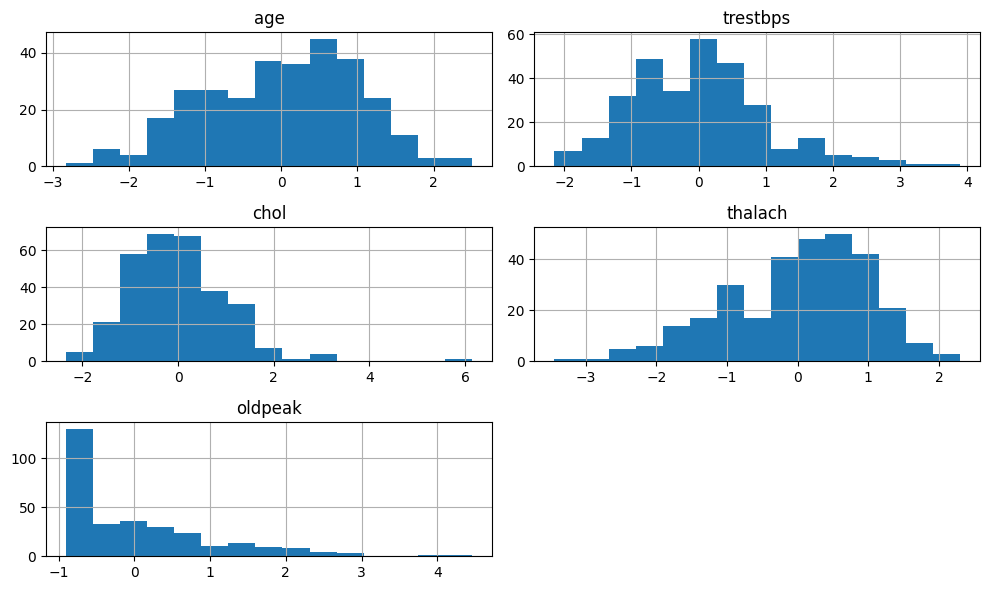

In [21]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[numerical_cols].hist(bins=15, figsize=(10, 6))
plt.tight_layout()
plt.show()

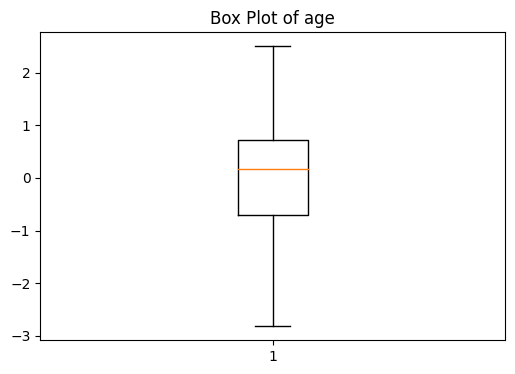

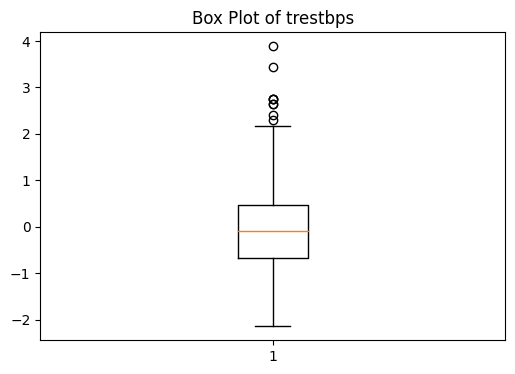

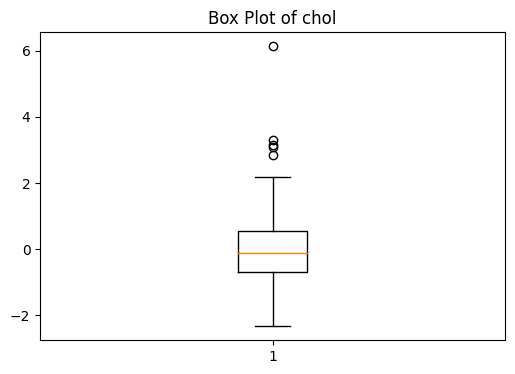

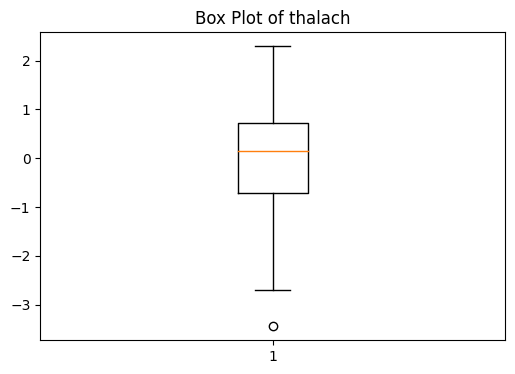

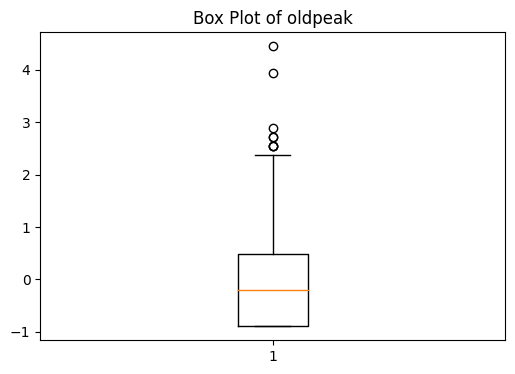

In [22]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X[col])
    plt.title(f'Box Plot of {col}')
    plt.show()